In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import os
import shutil
from PIL import Image
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

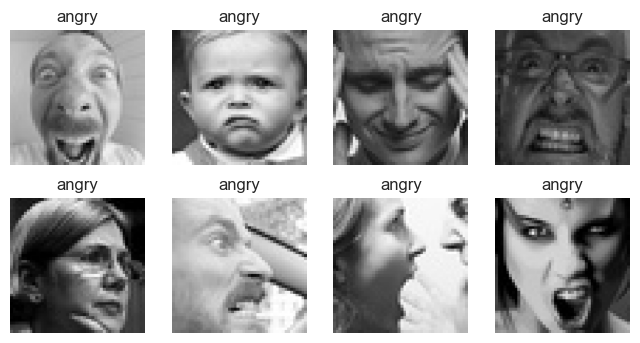

In [3]:
from tensorflow.keras.preprocessing.image import load_img
# Path to the directory containing the images
dir_path = 'cv_faces/archive/train/angry/'
label = 'angry'
# Get the list of image files in the directory
img_files = os.listdir(dir_path)
# Limit the number of images to be plotted to a maximum of 64
num_imgs = min(len(img_files), 8)
# Plot the images
plt.figure(figsize=(8, 4))
for i in range(num_imgs):
 # Load the image
 img_path = os.path.join(dir_path, img_files[i])
 img = load_img(img_path, target_size=(224, 224))
 plt.subplot(2, 4, i + 1)
 plt.imshow(img)
 plt.axis('off')
 plt.title(label)

plt.show()

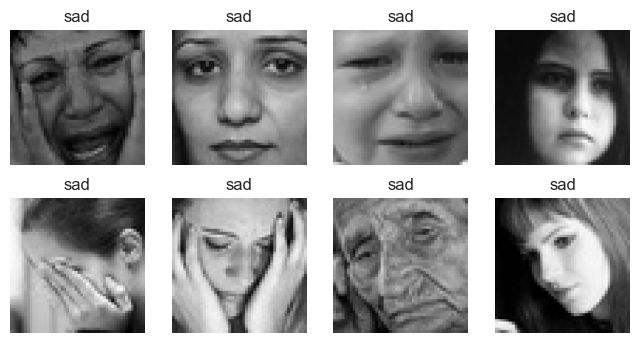

In [4]:
from tensorflow.keras.preprocessing.image import load_img
# Path to the directory containing the images
dir_path = 'cv_faces/archive/train/sad/'
label = 'sad'
# Get the list of image files in the directory
img_files = os.listdir(dir_path)
# Limit the number of images to be plotted to a maximum of 64
num_imgs = min(len(img_files), 8)
# Plot the images
plt.figure(figsize=(8, 4))
for i in range(num_imgs):
 # Load the image
 img_path = os.path.join(dir_path, img_files[i])
 img = load_img(img_path, target_size=(224, 224))
 plt.subplot(2, 4, i + 1)
 plt.imshow(img)
 plt.axis('off')
 plt.title(label)

plt.show()

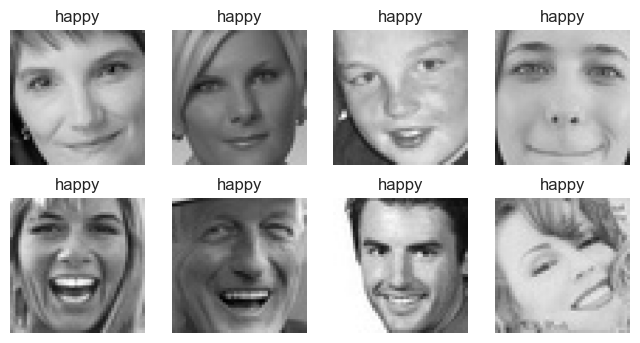

In [5]:
from tensorflow.keras.preprocessing.image import load_img
# Path to the directory containing the images
dir_path = 'cv_faces/archive/train/happy/'
label = 'happy'
# Get the list of image files in the directory
img_files = os.listdir(dir_path)
# Limit the number of images to be plotted to a maximum of 64
num_imgs = min(len(img_files), 8)
# Plot the images
plt.figure(figsize=(8, 4))
for i in range(num_imgs):
 # Load the image
 img_path = os.path.join(dir_path, img_files[i])
 img = load_img(img_path, target_size=(224, 224))
 plt.subplot(2, 4, i + 1)
 plt.imshow(img)
 plt.axis('off')
 plt.title(label)

plt.show()

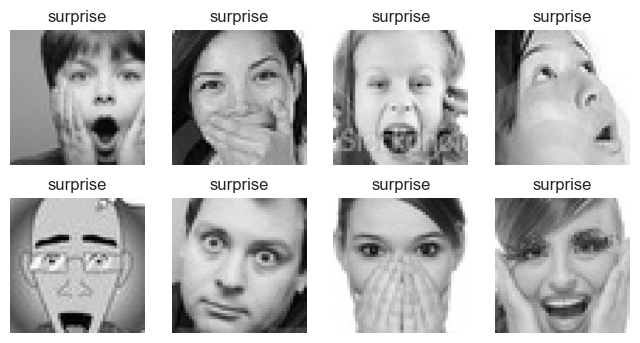

In [6]:
# Path to the directory containing the images
dir_path = 'cv_faces/archive/train/surprise/'
label = 'surprise'
# Get the list of image files in the directory
img_files = os.listdir(dir_path)
# Limit the number of images to be plotted to a maximum of 64
num_imgs = min(len(img_files), 8)
# Plot the images
plt.figure(figsize=(8, 4))
for i in range(num_imgs):
 # Load the image
 img_path = os.path.join(dir_path, img_files[i])
 img = load_img(img_path, target_size=(224, 224))
 plt.subplot(2, 4, i + 1)
 plt.imshow(img)
 plt.axis('off')
 plt.title(label)

plt.show()

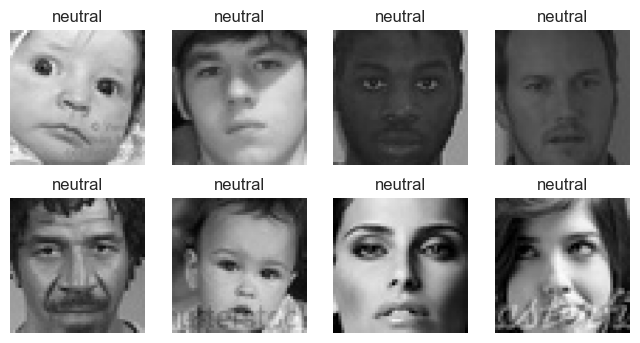

In [7]:
# Path to the directory containing the images
dir_path = 'cv_faces/archive/train/neutral/'
label = 'neutral'
# Get the list of image files in the directory
img_files = os.listdir(dir_path)
# Limit the number of images to be plotted to a maximum of 64
num_imgs = min(len(img_files), 8)
# Plot the images
plt.figure(figsize=(8, 4))
for i in range(num_imgs):
 # Load the image
 img_path = os.path.join(dir_path, img_files[i])
 img = load_img(img_path, target_size=(224, 224))
 plt.subplot(2, 4, i + 1)
 plt.imshow(img)
 plt.axis('off')
 plt.title(label)

plt.show()

In [10]:
train_dir = 'cv_faces/archive/train/'
test_dir = 'cv_faces/archive/test/'

In [11]:
import os
import pandas as pd

filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
    
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis=1)


NotADirectoryError: [Errno 20] Not a directory: 'cv_faces/archive/train/.DS_Store'

In [15]:
train_df

,filepaths,labels
0,cv_faces/train/happy/Training_4460748.jpg,happy
1,cv_faces/train/happy/Training_6312930.jpg,happy
2,cv_faces/train/happy/Training_25740534.jpg,happy
3,cv_faces/train/happy/Training_431681.jpg,happy
4,cv_faces/train/happy/Training_39023213.jpg,happy
...,...,...
10715,cv_faces/train/angry/Training_4896466.jpg,angry
10716,cv_faces/train/angry/Training_22547261.jpg,angry
10717,cv_faces/train/angry/Training_25785881.jpg,angry
10718,cv_faces/train/angry/Training_44988268.jpg,angry


In [17]:
import os
import pandas as pd

filepaths = []
labels = []

# List directories within the test directory
folds = [f for f in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, f))]

for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis=1)


In [18]:
test_df

,filepaths,labels
0,cv_faces/test/happy/PrivateTest_45699463.jpg,happy
1,cv_faces/test/happy/PrivateTest_61855708.jpg,happy
2,cv_faces/test/happy/PrivateTest_52109800.jpg,happy
3,cv_faces/test/happy/PrivateTest_16487993.jpg,happy
4,cv_faces/test/happy/PrivateTest_32138585.jpg,happy
...,...,...
2224,cv_faces/test/angry/PrivateTest_2775163.jpg,angry
2225,cv_faces/test/angry/PrivateTest_45595830.jpg,angry
2226,cv_faces/test/angry/PrivateTest_3411628.jpg,angry
2227,cv_faces/test/angry/PrivateTest_21230097.jpg,angry


In [19]:
valid_df, test_df = train_test_split(test_df, train_size= 0.6, shuffle= True, random_state= 123)

In [21]:
train_generator = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2, 
    rotation_range=5, 
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2, 
    horizontal_flip=True, 
    vertical_flip=True, 
    fill_mode='nearest'
).flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(48, 48),
    batch_size=64,
    class_mode="categorical",
    shuffle=True
)

valid_generator = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2
).flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(48, 48),
    batch_size=64,
    class_mode="categorical",
    shuffle=True
)

test_generator = ImageDataGenerator(
    rescale=1./255
).flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(48, 48),
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)


Found 10720 validated image filenames belonging to 5 classes.
Found 1337 validated image filenames belonging to 5 classes.
Found 892 validated image filenames belonging to 5 classes.


In [22]:
img_shape = train_generator.image_shape
print("Shape of the images generated by train_generator:", img_shape)

Shape of the images generated by train_generator: (48, 48, 3)


In [23]:
img_shape_valid = valid_generator.image_shape
print("Shape of the images generated by valid_generator:", img_shape_valid)

Shape of the images generated by valid_generator: (48, 48, 3)


In [24]:
img_shape_test = test_generator.image_shape
print("Shape of the images generated by test_generator:", img_shape_test)

Shape of the images generated by test_generator: (48, 48, 3)


In [82]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [83]:
for layer in base_model.layers:
     layer.trainable = False

In [84]:
input_shape = (48, 48, 3)

# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

# Flatten the output before feeding into Dense layers
model.add(Flatten())

# Add Dense layers with dropout for regularization
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(256, activation='relu'))

# Output layer with softmax activation for multi-class classification
num_classes = 5  # Change to 5 classes
model.add(Dense(num_classes, activation='softmax'))

# Change input shape to accept grayscale images with one channel
input_shape = (48, 48, 1)

# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

# Flatten the output before feeding into Dense layers
model.add(Flatten())

# Add Dense layers with dropout for regularization
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(256, activation='relu'))

# Output layer with softmax activation for multi-class classification
num_classes = 5  # Change to 5 classes
model.add(Dense(num_classes, activation='softmax'))



In [85]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,599,941 (9.92 MB)

 Trainable params: 2,599,941 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
METRICS = [
 tf.keras.metrics.BinaryAccuracy(name='accuracy'),
 tf.keras.metrics.Precision(name='precision'),
 tf.keras.metrics.Recall(name='recall'),
 tf.keras.metrics.AUC(name='auc')
]

In [88]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
lrd = ReduceLROnPlateau(
 monitor='val_loss',
 patience=20,
 verbose=1,
 factor=0.50,
 min_lr=1e-10
)
es = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, mode='min')

In [40]:
history = model.fit(x=train_generator,
 validation_data=valid_generator,
 epochs=30,
 validation_steps= None,
 shuffle= False,
 callbacks=[lrd, es]
)

Epoch 1/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 48s 283ms/step - accuracy: 0.2963 - loss: 1.5805 - val_accuracy: 0.3067 - val_loss: 1.5679 - learning_rate: 1.0000e-04
Epoch 2/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 46s 273ms/step - accuracy: 0.3087 - loss: 1.5681 - val_accuracy: 0.3201 - val_loss: 1.5516 - learning_rate: 1.0000e-04
Epoch 3/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 47s 279ms/step - accuracy: 0.3151 - loss: 1.5546 - val_accuracy: 0.3254 - val_loss: 1.5389 - learning_rate: 1.0000e-04
Epoch 4/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 47s 278ms/step - accuracy: 0.3093 - loss: 1.5489 - val_accuracy: 0.3201 - val_loss: 1.5344 - learning_rate: 1.0000e-04
Epoch 5/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 47s 279ms/step - accuracy: 0.3117 - loss: 1.5452 - val_accuracy: 0.3515 - val_loss: 1.5406 - learning_rate: 1.0000e-04
Epoch 6/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 51s 306ms/step - accuracy: 0.3120 - loss: 1.5360 - val_accuracy: 0.3448 - val_loss: 1.4967 - learning_rate: 1.0000e-04
Epoch 7/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 57s 34

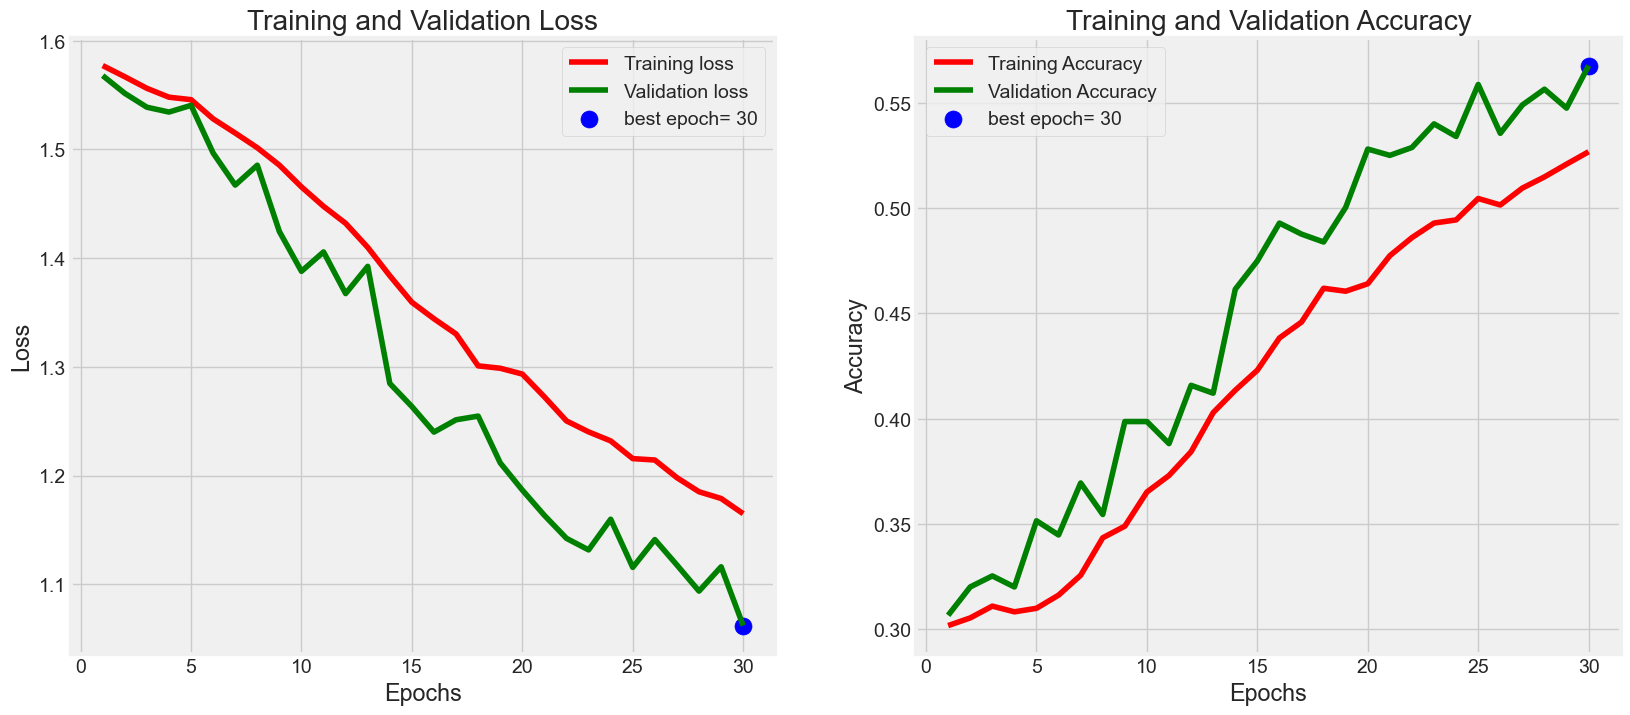

In [41]:
# Extract training and validation data from history
train_accuracy= history.history['accuracy']
train_loss = history.history['loss']
valid_accuracy = history.history['val_accuracy']
valid_loss = history.history['val_loss']

# Find epochs with minimum validation loss and maximum validation accuracy
index_loss = np.argmin(valid_loss)
valid_lowest = valid_loss[index_loss]
index_accuracy = np.argmax(valid_accuracy)
highest_accuracy = valid_accuracy[index_accuracy]

# Prepare labels for best epoch markers
Epochs = [i+1 for i in range(len(train_accuracy))]
loss_label = f'best epoch= {str(index_loss + 1)}'
accuracy_label = f'best epoch= {str(index_accuracy + 1)}'

# Configuring the plot
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

# Subplot 1: Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(Epochs, train_loss, 'r', label= 'Training loss')
plt.plot(Epochs, valid_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, valid_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot 2: Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(Epochs, train_accuracy, 'r', label= 'Training Accuracy')
plt.plot(Epochs, valid_accuracy, 'g', label= 'Validation Accuracy')
plt.scatter(index_accuracy + 1 , highest_accuracy, s= 150, c= 'blue', label= accuracy_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

In [42]:
# For predictions on test data
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


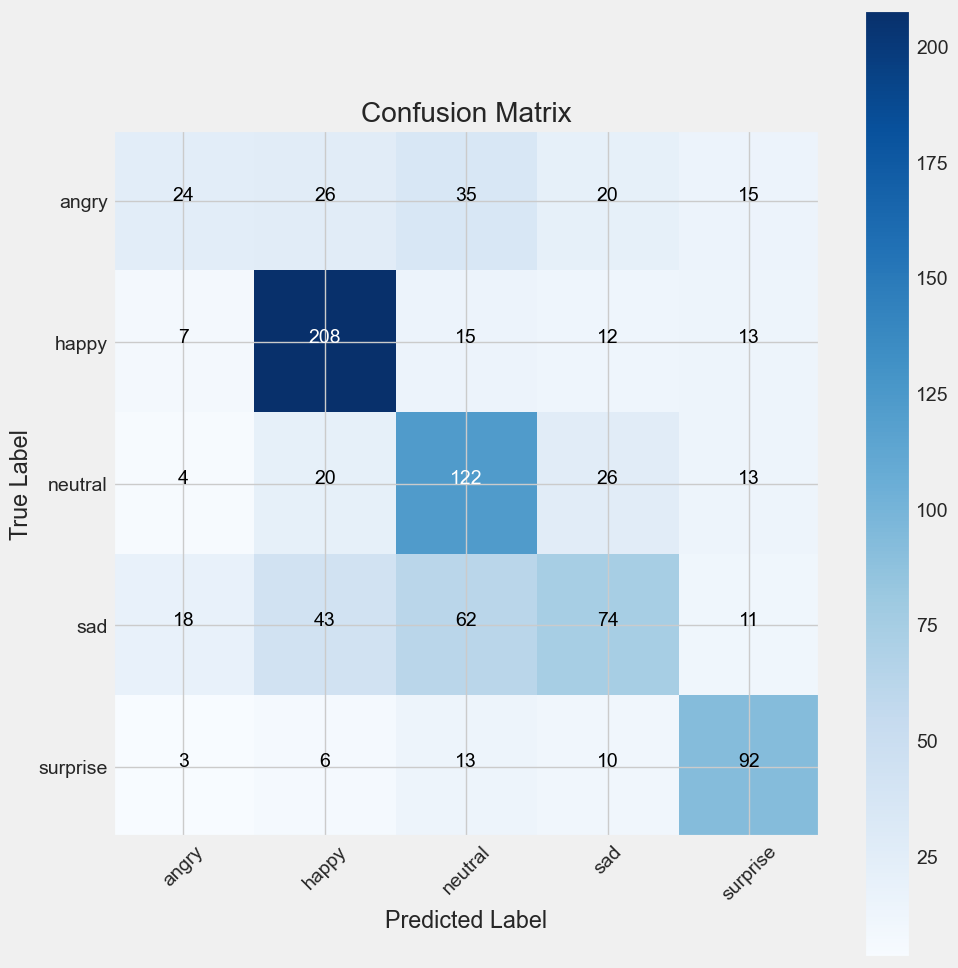

In [43]:
# Get class labels
gen_dict = test_generator.class_indices
classes = list(gen_dict.keys())

# Calculate Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot confusion matrix
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Display class labels on tick marks
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2. # threshold for text color based on background intensity

# Annotate confusion matrix cells with counts and adjust text color
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
        
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [44]:
print(classification_report(test_generator.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

       angry       0.43      0.20      0.27       120
       happy       0.69      0.82      0.75       255
     neutral       0.49      0.66      0.56       185
         sad       0.52      0.36      0.42       208
    surprise       0.64      0.74      0.69       124

    accuracy                           0.58       892
   macro avg       0.55      0.55      0.54       892
weighted avg       0.57      0.58      0.56       892



In [1]:
# Save the model using the native Keras format
model.save('my_model.keras')

NameError: name 'model' is not defined

In [54]:
# Convert model architecture to JSON format
model_json = model.to_json()

# Save JSON to a file
with open("my_model.json", "w") as json_file:
    json_file.write(model_json)


In [47]:
# Load the model
from tensorflow.keras.models import load_model

loaded_model = load_model('my_model.keras')
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [55]:
# Load the image
image_path = "cv_faces/test/neutral/PrivateTest_75733743.jpg"
image = Image.open(image_path)

# Preprocess the image
img = image.resize((48, 48))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0 # Rescale to [0, 1]

# Ensure correct shape and number of channels
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
img_array = tf.image.resize(img_array, [48, 48]) # Resize image
img_array = tf.image.grayscale_to_rgb(img_array) # Convert to RGB

# Make predictions
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])

# Get class labels
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class = class_labels[predicted_class_index]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted class: neutral


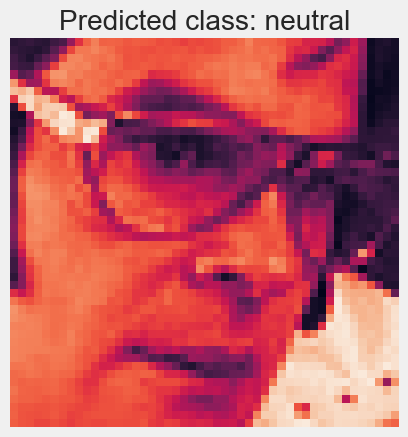

In [56]:
plt.imshow(image)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()